In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
customer_data.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
#so ebar ami clustering uprt project kori asu, k means clustering (unsupervised learning), cluster mane ki hoi??--> it means grouping similar data points together, tar mane suppose people with high income,high spending june kore mall ot hihotok ami eta cluster ot rakhim
# and people with low income and low spending jar hoi, hihotok eta cluster ot
# atia code tut [rows,columns] etu format ot thake inside bracket, mane [: ---> etu mane all rows, [3,4] mane selecting only 3rd and 4th column, but 3:4 mane only 3rd column(12th class ot slicing porhisilu je)
# now .values mane amar juntu select kora rows and columns ami loisu hetu numpy array t convert kori diye for ml learning algorithms
# iloc use koru to select particular rows and columns, if use nokoru then ami specific rows gita select koribo nuwaru
# now eg: [2:4],[3,5] etu mane ki hoi?? ----> it means selecting 2nd and 3rd row and 3rd,4th and 5th column
X = customer_data.iloc[:,[3,4]].values

In [12]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [20]:
# so etu part ot saba olop case tu ase yate, first ami eta wcss buli eta variable loisu which means within cluster sum of square and tate empty list khumai disu
# now loop start korisu from 1 to 10, for i=1 mane 1 cluster first, innit kmeans ++ mane hei eta cluster tu smartly centre ot place kori dibo otherwise jote jote cluster tu bohai dile hoi, which is bad
# then hetu ami ami eta cluster centre bhal position ot thoi bhalke separate kori using random_state kmeans ot khumai disu and then ami hetu amar X (amar 3rd and 4th column tu ase yate) or logt fit korai disu kmeans model tu
# and then append(kmeans.inertia_) 'e amak add kori koi, hei cluster gita each other kiman durot ase, jiman durot khiman beya , less=better and ami wcss list ot bhorai disu juntu eta dangor no ahe
# similarly eneke next for i=2 hobo 2 cluster and then last ot wcss list tut add hoi jabo beleg ke
# at last amar wcss list tu 10 ta value thakibo, juntu best value hobo, suppose 4th jagat starting from zero index judi sobotse kom value hoi then 4 clusters is the best

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


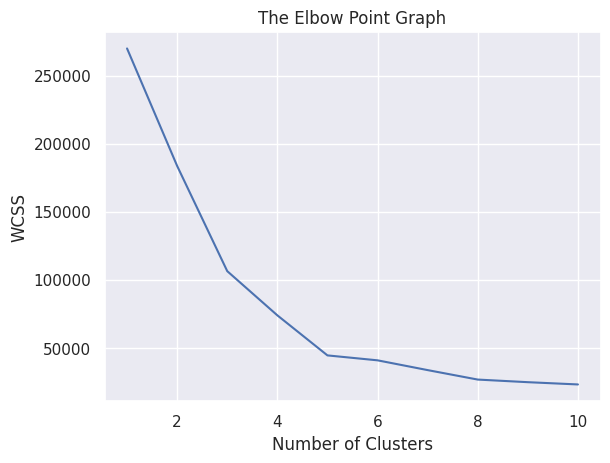

In [21]:

# yate ami plot korisu, graph ot
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# yate graph ot sua, ami elbow method e di graph tu bonaisu, yate sua jiman wcss or value kom khiman e bhal but juntu jagat besi better??--> juntu jagat drop hoi hoi hothat flat hoi jai hei point tu best
#yate no of cluster = 5 point tut sudden olop flat hoi jai, it means 5 cluster is best
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
Y = kmeans.fit_predict(X)

In [24]:
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


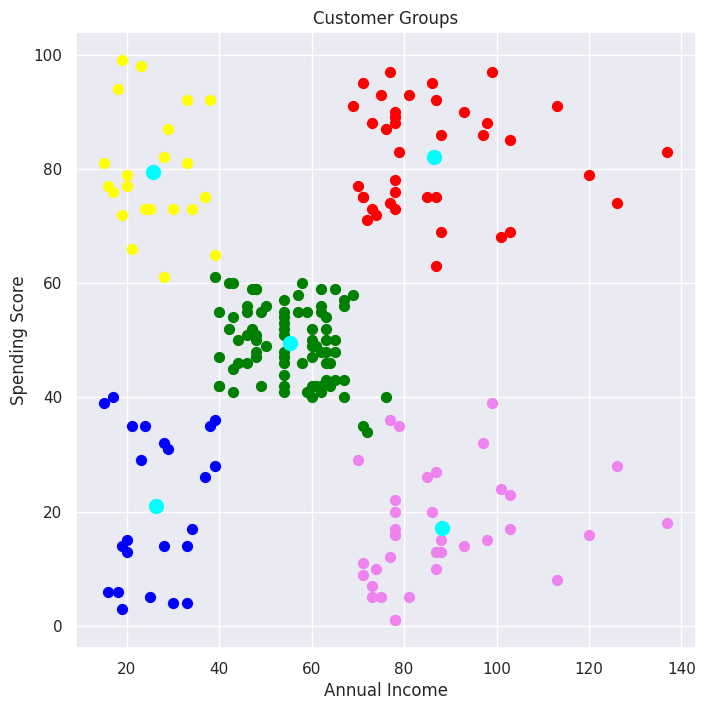

In [25]:
# uporor output etu mane each no means cluster mane 4 no cluster mean koribo pare people with high income,high spend
#3 mane high income, low spend etc 3 mane low income, low spend.... just example disu haan

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [33]:
# so last ot ami, graph plot kora pisot ami, eta new column bonalu cluster, and then tate Y value gita khumai disu, y't amar model e predict korisile clusters heigita ase
# and then ami simply display korisu 10 members, which member belongs to which cluster

customer_data['Cluster'] = Y
print(customer_data.head(10))


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1    Male   19                  15                      39        4
1           2    Male   21                  15                      81        2
2           3  Female   20                  16                       6        4
3           4  Female   23                  16                      77        2
4           5  Female   31                  17                      40        4
5           6  Female   22                  17                      76        2
6           7  Female   35                  18                       6        4
7           8  Female   23                  18                      94        2
8           9    Male   64                  19                       3        4
9          10  Female   30                  19                      72        2
